c:\Users\Sibyl\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


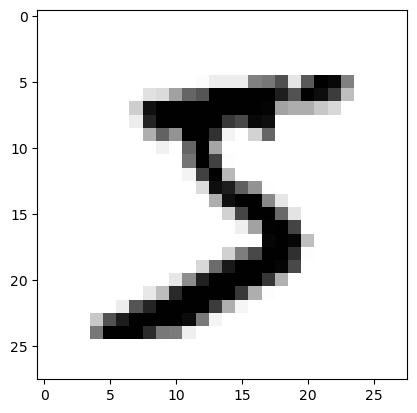

Label de la première image : 5


In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Charger le dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normaliser les images
train_images, test_images = train_images / 255.0, test_images / 255.0

# Vérifier la première image
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()
print("Label de la première image :", train_labels[0])




Epoch 1/5


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2931 - accuracy: 0.9153
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1443 - accuracy: 0.9575
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1079 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0877 - accuracy: 0.9732
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0717 - accuracy: 0.9789

Précision sur l'ensemble de test : 0.9789000153541565
1/1 [==============================] - 0s 93ms/step


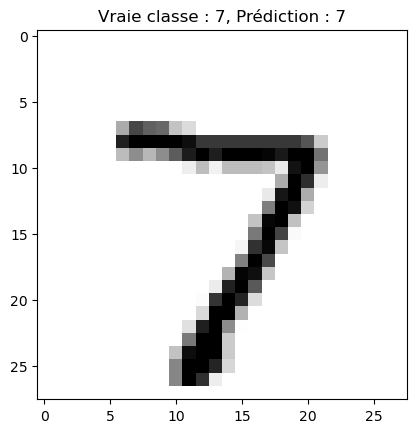

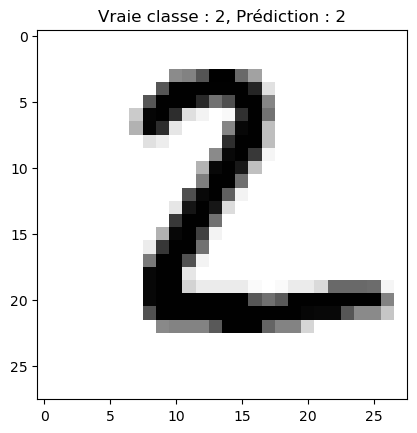

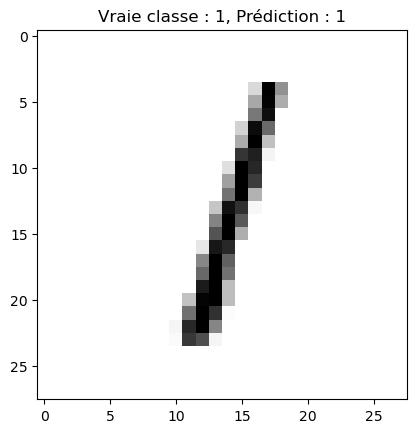

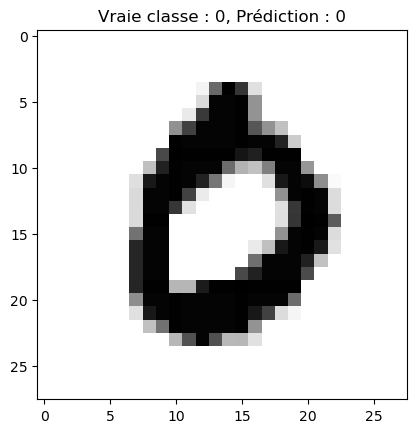

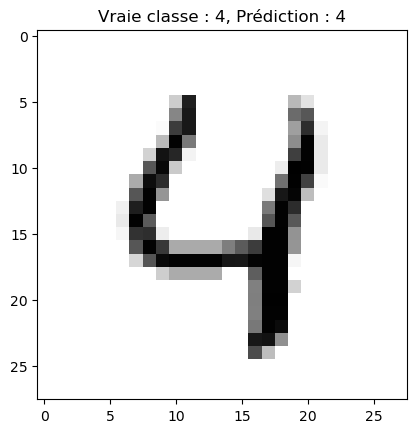

In [10]:
# Créer le modèle
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))  # Aplatir l'image 28x28 en un vecteur 1D
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))  # Ajouter une couche de dropout pour la régularisation
model.add(layers.Dense(10, activation='softmax'))  # Couche de sortie avec 10 neurones pour les 10 classes

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
model.fit(train_images, train_labels, epochs=5)

# Évaluer la précision sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nPrécision sur l'ensemble de test : {test_acc}")

# Faire des prédictions sur quelques images de l'ensemble de test
predictions = model.predict(test_images[:5])

# Afficher les résultats
for i in range(5):
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(f"Vraie classe : {test_labels[i]}, Prédiction : {tf.argmax(predictions[i])}")
    plt.show()


### Comparaison dimensionnement image

##### [Dimension image] - Méthode 1 manuelle - Etape 1/2 (Réduction de la taille de l'image : méthode pillow et cv2)

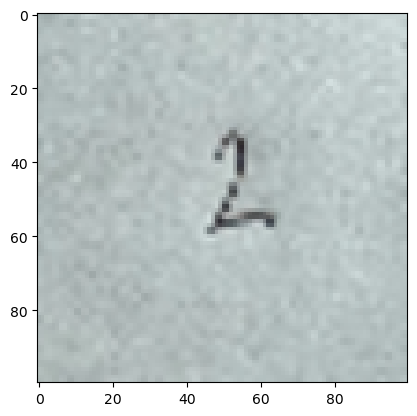

In [5]:
#[Dimension image] - Méthode 1 manuelle - Etape 1/2 (Réduction de la taille de l'image : méthode pillow et cv2)
import cv2
from PIL import Image
import matplotlib.pyplot as plt



def resize_and_reduce_combined(image_path, target_width, target_height):
    img = cv2.imread(image_path)
    resized_img_opencv = cv2.resize(img, (target_width // 2, target_height // 2))  # Réduction initiale
    resized_img_pillow = Image.fromarray(resized_img_opencv).resize((target_width, target_height))
    return resized_img_pillow

# Exemple d'utilisation
image_path =  r'C:\Users\Sibyl\Documents\ETUDES\05_ISEP_A3_BI\Machine learning\IMG_M2.jpg'
target_width = 100
target_height = 100
resized_image_cv2_pil = resize_and_reduce_combined(image_path, target_width, target_height)

# Afficher l'image
plt.imshow(resized_image_cv2_pil)
plt.show()


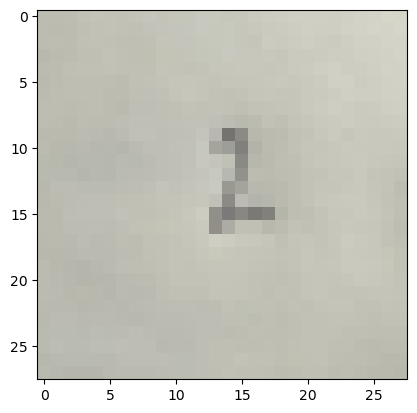

In [3]:
from PIL import Image

def resize_and_reduce_pillow(image_path, target_width, target_height):
    img = Image.open(image_path)
    resized_img = img.resize((target_width, target_height))
    return resized_img

# Exemple d'utilisation
image_path = r'C:\Users\Sibyl\Documents\ETUDES\05_ISEP_A3_BI\Machine learning\IMG_M2.jpg'
target_width = 100
target_height = 100
resized_image_pil = resize_and_reduce_pillow(image_path, target_width, target_height)


# Afficher l'image
plt.imshow(resized_image_pil)
plt.show()



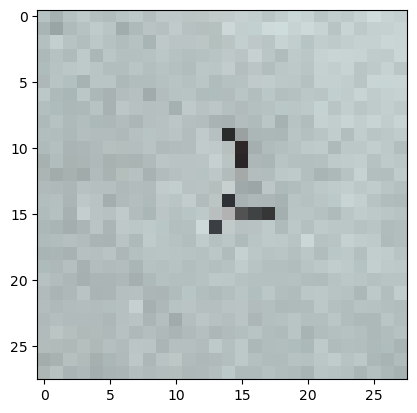

In [6]:
import cv2

def resize_and_reduce(image_path, target_width, target_height):
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, (target_width, target_height))
    return resized_img

# Exemple d'utilisation
image_path = r'C:\Users\Sibyl\Documents\ETUDES\05_ISEP_A3_BI\Machine learning\IMG_M2.jpg'
target_width = 28
target_height = 28
resized_image_cv2 = resize_and_reduce(image_path, target_width, target_height)


# Afficher l'image
plt.imshow(resized_image_cv2)
plt.show()




#### [Dimension image] - Méthode 1 manuelle - Etape 2/2

In [14]:
#[Dimension image] - Méthode 1 manuelle - Etape 2/2 (
def resize_image(image_path, new_width, new_height):
    # Charger l'image
    img = image_path

    # Redimensionner l'image
    img_resized = cv2.resize(img, (new_width, new_height))

    # Afficher l'image redimensionnée (optionnel)
    cv2.imshow('Image Redimensionnée', img_resized)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return img_resized

# Exemple d'utilisation
image_path = resized_image_cv2 #r'C:\Users\Sibyl\Documents\ETUDES\05_ISEP_A3_BI\Machine learning\IMG_M2.jpg'
new_width = 28
new_height = 28
resized_image = resize_image(image_path, new_width, new_height)


In [ ]:
#[Dimension image] - Méthode 1 manuelle - Etape 2/2 (
def resize_image(image_path, new_width, new_height):
    # Charger l'image
    img = cv2.imread(image_path)

    # Redimensionner l'image
    img_resized = cv2.resize(img, (new_width, new_height))

    # Afficher l'image redimensionnée (optionnel)
    cv2.imshow('Image Redimensionnée', img_resized)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return img_resized

# Exemple d'utilisation
image_path = resized_image_cv2 #r'C:\Users\Sibyl\Documents\ETUDES\05_ISEP_A3_BI\Machine learning\IMG_M2.jpg'
new_width = 28
new_height = 28
resized_image = resize_image(image_path, new_width, new_height)


NameError: name 'resized_image_cv2' is not defined

In [1]:
import cv2
import numpy as np
from skimage import io, color, filters

def preprocess_image(image_path):
    # Charger l'image
    image = io.imread(image_path)

    # Convertir l'image en niveaux de gris
    gray_image = color.rgb2gray(image)

    # Appliquer un filtre de médiane pour éliminer le bruit
    denoised_image = cv2.medianBlur((gray_image * 255).astype(np.uint8), 3)

    # Appliquer un filtre de Canny pour détecter les contours
    edges = cv2.Canny(denoised_image, 50, 150)

    # Appliquer une transformation de dilatation pour élargir les contours
    dilated_edges = cv2.dilate(edges, None, iterations=2)

    # Trouver les contours de l'image dilatée
    contours, _ = cv2.findContours(dilated_edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Créer une image masque pour les contours
    mask = np.zeros_like(denoised_image)

    # Dessiner les contours sur la masque
    cv2.drawContours(mask, contours, -1, 255, 1)

    # Appliquer le masque pour supprimer les contours de l'image originale
    clean_image = cv2.bitwise_and(denoised_image, denoised_image, mask=mask)

    # Afficher l'image originale et l'image traitée
    cv2.imshow('Original Image', denoised_image)
    cv2.imshow('Cleaned Image', clean_image)

    # Attendre que l'utilisateur appuie sur une touche pour fermer les fenêtres
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Enregistrer l'image traitée
    cv2.imwrite('cleaned_image.jpg', clean_image)

if __name__ == "__main__":
    image_path = r'C:\Users\Sibyl\Documents\ETUDES\05_ISEP_A3_BI\Machine learning\IMG_M2.jpg'
    preprocess_image(image_path)





Epoch 1/10


1500/1500 [==============================] - 22s 14ms/step - loss: 2.3018 - accuracy: 0.1115 - val_loss: 2.3008 - val_accuracy: 0.1126
Epoch 2/10
1500/1500 [==============================] - 20s 13ms/step - loss: 2.3015 - accuracy: 0.1123 - val_loss: 2.3010 - val_accuracy: 0.1126
Epoch 3/10
1500/1500 [==============================] - 21s 14ms/step - loss: 2.3015 - accuracy: 0.1123 - val_loss: 2.3007 - val_accuracy: 0.1126
Epoch 4/10
1500/1500 [==============================] - 21s 14ms/step - loss: 2.3015 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 5/10
1500/1500 [==============================] - 22s 15ms/step - loss: 2.3015 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 6/10
1500/1500 [==============================] - 24s 16ms/step - loss: 2.3015 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 7/10
1500/1500 [==============================] - 24s 16ms/step - loss: 2.3014 - accuracy: 0.1123 - val_loss: 2.3

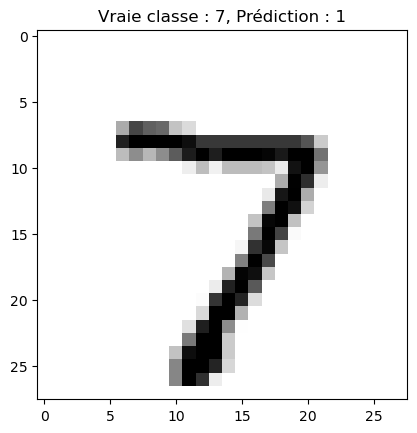

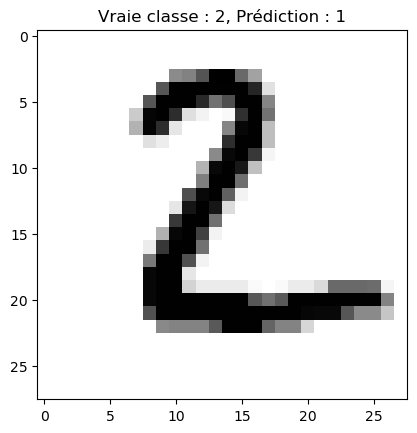

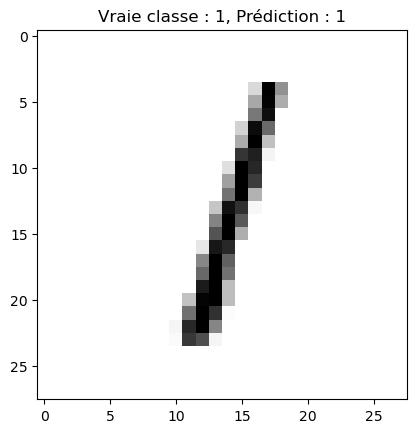

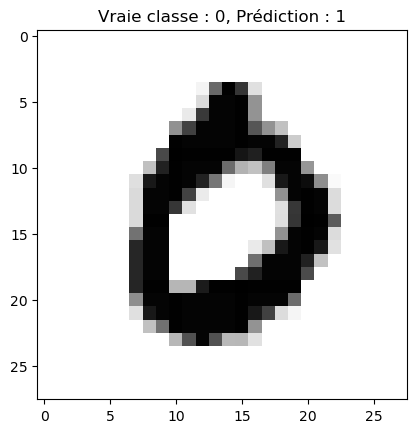

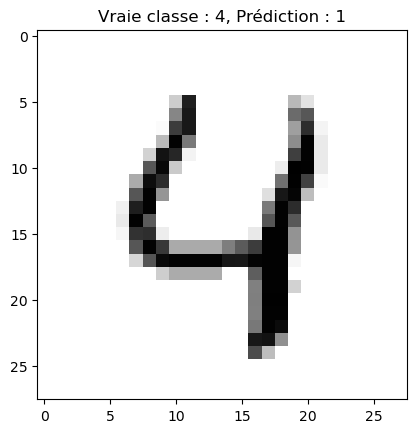

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from skimage import io, color
import cv2
import numpy as np

# Charger le dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normaliser les images
train_images, test_images = train_images / 255.0, test_images / 255.0

# Définir l'architecture du modèle CNN
img_height, img_width, img_channels = 28, 28, 1  # Taille des images MNIST
num_classes = 10  # Nombre de classes pour MNIST

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Prétraitement des données (normalisation, redimensionnement, etc.)
def preprocess_image(image_path):
    # Charger l'image
    image = io.imread(image_path)

    # Convertir l'image en niveaux de gris
    gray_image = color.rgb2gray(image)

    # Appliquer un filtre de médiane pour éliminer le bruit
    denoised_image = cv2.medianBlur((gray_image * 255).astype(np.uint8), 3)

    # Appliquer un filtre de Canny pour détecter les contours
    edges = cv2.Canny(denoised_image, 50, 150)

    # Appliquer une transformation de dilatation pour élargir les contours
    dilated_edges = cv2.dilate(edges, None, iterations=2)

    # Trouver les contours de l'image dilatée
    contours, _ = cv2.findContours(dilated_edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Créer une image masque pour les contours
    mask = np.zeros_like(denoised_image)

    # Dessiner les contours sur la masque
    cv2.drawContours(mask, contours, -1, 255, 1)

    # Appliquer le masque pour supprimer les contours de l'image originale
    clean_image = cv2.bitwise_and(denoised_image, denoised_image, mask=mask)

    # Afficher l'image originale et l'image traitée
    cv2.imshow('Original Image', denoised_image)
    cv2.imshow('Cleaned Image', clean_image)

    # Attendre que l'utilisateur appuie sur une touche pour fermer les fenêtres
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Enregistrer l'image traitée
    cv2.imwrite('cleaned_image.jpg', clean_image)


# Entraîner le modèle avec des générateurs d'images
batch_size = 32
epochs = 10

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow(train_images[..., np.newaxis], train_labels, batch_size=batch_size, subset='training')
validation_generator = train_datagen.flow(train_images[..., np.newaxis], train_labels, batch_size=batch_size, subset='validation')

history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Évaluer la précision sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_images[..., np.newaxis], test_labels)
print(f"\nPrécision sur l'ensemble de test : {test_acc}")

# Faire des prédictions sur quelques images de l'ensemble de test
predictions = model.predict(test_images[..., np.newaxis][:5])

# Afficher les résultats
for i in range(5):
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(f"Vraie classe : {test_labels[i]}, Prédiction : {np.argmax(predictions[i])}")
    plt.show()


1/1 [==============================] - 0s 227ms/step


<Figure size 640x480 with 0 Axes>

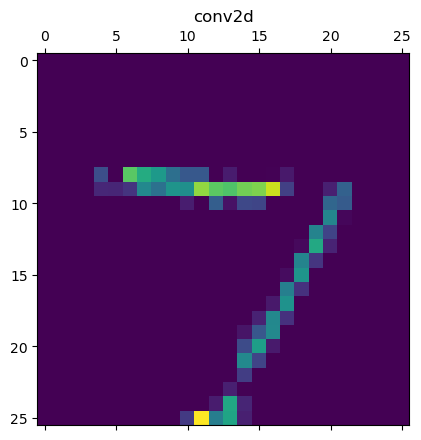

<Figure size 640x480 with 0 Axes>

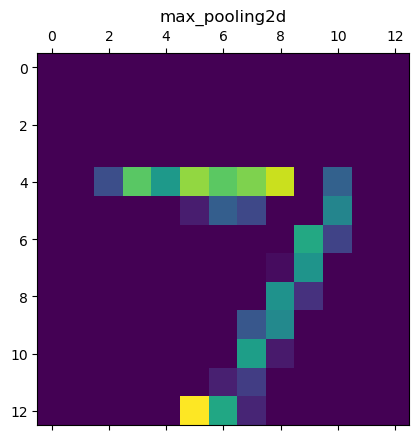

<Figure size 640x480 with 0 Axes>

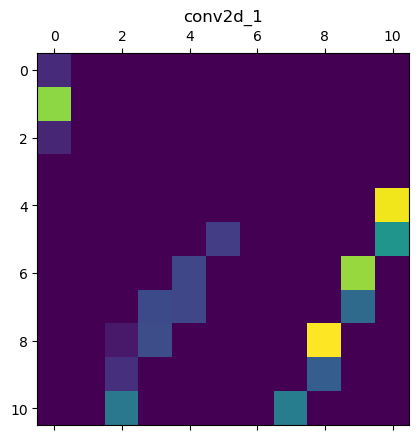

<Figure size 640x480 with 0 Axes>

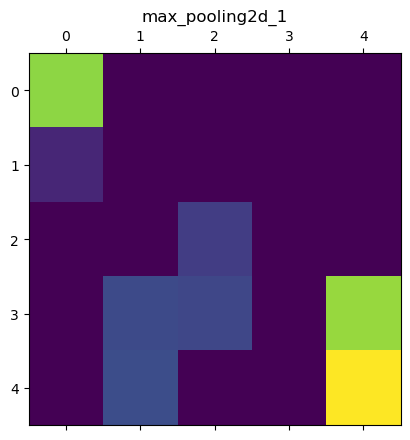

<Figure size 640x480 with 0 Axes>

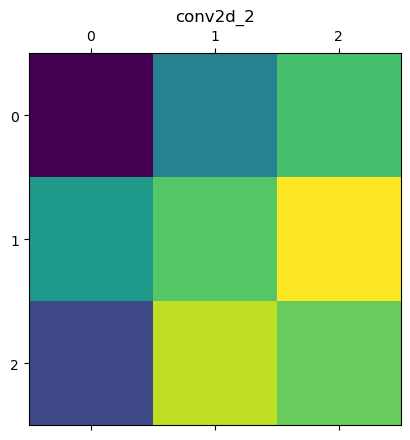

<Figure size 640x480 with 0 Axes>

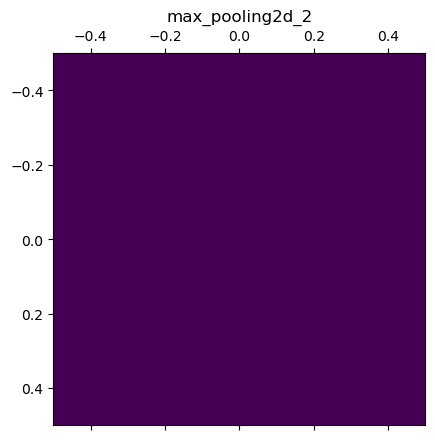

In [3]:
from tensorflow.keras import models

# Sélectionner un exemple d'image du jeu de test
sample_image = test_images[0][np.newaxis, ..., np.newaxis]

# Obtenir les sorties des couches intermédiaires
layer_outputs = [layer.output for layer in model.layers[:6]]  # Sélectionner les premières couches

# Créer un modèle qui renvoie les activations des couches intermédiaires pour un exemple donné
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Obtenir les activations pour l'exemple sélectionné
activations = activation_model.predict(sample_image)

# Afficher les activations
layer_names = [layer.name for layer in model.layers[:6]]  # Nom des couches sélectionnées
for layer_name, activation in zip(layer_names, activations):
    plt.figure()
    plt.matshow(activation[0, :, :, 0], cmap='viridis')
    plt.title(layer_name)
